# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

pandas(熊猫库)是Python中一个非常有用的库，其中`Series` 和 `DataFrame`两种数据结构是处理数据的利器。他们也将是本节课的重点，在结合`NumPy`[(点我学习NumPy)](http://www.quantopian.com/lectures#Introduction-to-NumPy)的情况下，我们能轻松应对金融中的统计学和数学方面的计算。

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import scipy
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

通过使用pandas,可以很轻松地对数据进行存储，可视化和计算等操作。仅用几行代码,不仅能让你的数据更具备可读性,
还能通过pandas，将上节课中(NumPy的学习)模拟的回报数据以`DataFrame`数据结构存储，完成相关的计算并对其画图。

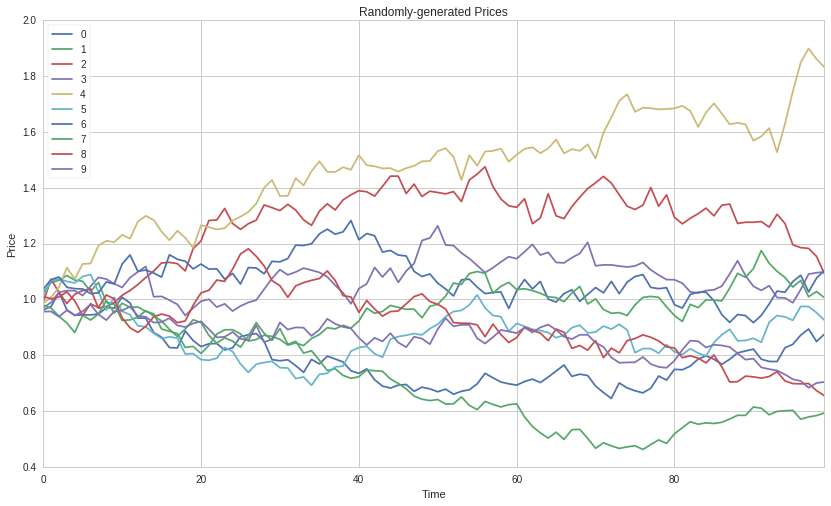

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

让我们具体来看下这些都是怎么实现的吧~~~

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

## pandas的数据结构

### `Series`

pandas中的`Series`是一个带标签的一维数组，任何数据类型都可以成为其元素。我们主要用它来处理时间序列数据。创建`Series`对象的方法是：`pandas.Series(elements)`,其中`elements`可以是Python的中的列表或者NumPy中的数组。

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

每一个`Series`都有一个名字。我们视`name`为`Series`的一个参数，可以在创建`Series`时，以传参的方式对`Series`命名，或者稍后对这个属性赋值。在上面的例子中，我们并没有给`Series`取名字，故这个属性值为空：

In [4]:
print(s.name)

None


This name can be directly modified with no repercussions.

我们可以直接对其赋值，完成名字的修改：

In [5]:
s.name = "Toy Series"
print(s.name)

Toy Series


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

我们将`Series`的行标签称作`index`。`index`和`name`一样，可以在创建`Series`时，就指定其值，或者稍后为其赋值。默认的`index`是从0开始的自然数序列，比如本例中的"Toy Series".

In [6]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

我们可以用pandas的内置函数`date_range()`为`s`创建一个日期索引。

In [7]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

`index`和对应的`Series`长度需保持一致，并且和`Series`的元素一一对应。满足这样条件`index`就可以直接赋值给`Series`的`index`.

In [8]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

`Series`的索引是处理时间序列数据的关键，待会我们会更深入探讨这个问题。

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

#### 访问 `Series`中的元素

`Series`可以通过`iloc[]` 和 `loc[]`来访问其元素。`iloc`是用元素的位置序列号来访问其值；`loc`是用`Series.index`中的值来访问其元素。

In [9]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

`Series`的切片也和Python中的列表，NumPy中的数组十分类似:用分号来表示切片。

In [10]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

从指定的第一个元素(起始索引)开始，按照一定的步长(默认是1)选择元素，直到你指定的最后一个元素(结束索引)，但是不包含最后一个元素. 

In [11]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

我们可以用负数作为切片步长，这样就能对`Series`进行逆向索引：

In [12]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

下面的例子中，设定的步长为1，我们从倒数第二个元素开始取值，结束于倒数第三个元素(不包含结束索引值对应的元素：即倒数第四个元素)

In [13]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

我们也可以直接用`series.index`的值来访问元素。`s`的`index`是一个日期数据的集合(`Timestamp`对象)，我们可以通过指定日期来访问对应的值。

In [14]:
s.loc['2016-01-01']

1.0

Or even for a range of dates!

或者一个范围内的日期！

In [14]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

对于`Series`，我们仅仅使用方括号(`[]`) 来访问元素，但这并不是一个好主意，这个会带来歧义(假设你用一段数据序列，比如2到6作为`s`的`index`,那么`s[2]`表达的是第0个元素还是第3个元素呢?),这个问题会在`DataFrame`表现的更为明显，所以我们建议在对元素进行切片或者访问时，请使用`loc`或者`iloc`。

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

#### 布尔值索引

除了上面提到的方法，我们还可以用布尔值数组来筛选`Series`。`Series`可以直接用标准的比较操作符进行计算，得到的新`Series`，其形状和原`Series`一样，值由`True`或者`False`构成。

In [15]:
print(s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

我们可以将这个布尔`Series`作为`Series`的筛选器，筛选出对应位置是`True`的元素。

In [16]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

我们也可以用逻辑操作符`&`, `|`, 和 `~` (分别对应`and`, `or`, 和 `not`)来组成复合判断条件。

In [18]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

通过这种方法，我们将很容易提取我们想要的数据，这一点在`DataFrame`中会表现的更为明显。

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

#### 时间序列和索引
当我们用`Series`处理时间序列数据时，我们需要注意，如何去处理时间数据。在这里我们将使用`pandas`中的`Timestamp`对象。让我们用平台的`get_pricing()`来获取一个完整的时间序列数据，并通过一些操作得到我们想要的结果。所有通过`get_pricing()`或者Pipeline API得到的数据都是 `Series` 或者`DataFrame`数据类型。我们对其index可随心所欲的修改。

In [19]:
# 因此处的get_pricing()为线上平台内置函数，故在线下是没法直接使用的的
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

In [2]:
# 译者为大家准备了一个A股数据，方便大家练习
symbol = "PAYH" # 平安银行
start = "2007-01-01"
end = "2017-10-01"

file_name = r'data\closeF.mat'
origin_data = loadmat(file_name)
data = pd.DataFrame(origin_data['data'])

origin = np.datetime64('0000-01-01', 'D') - np.timedelta64(1, 'D')
date = pd.DataFrame(origin_data['timeD']).applymap(lambda x : x * np.timedelta64(1, 'D') + origin)
data.index = date[0].tolist()
prices = data[0]
prices.name = 'price'

In [ ]:
prices

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

我们用`head()`方法来获取`Series`的前几个元素(或者`dataframe`的前几行元素)，并可指定显示多少个元素，默认是显示前5个元素，相对应的，显示最后几个元素的方式是`tail()`.

In [20]:
print("\n", type(prices))
prices.head(5) 


<class 'pandas.core.series.Series'>


2012-01-03 00:00:00+00:00    340.9800
2012-01-04 00:00:00+00:00    348.7400
2012-01-05 00:00:00+00:00    349.9900
2012-01-06 00:00:00+00:00    348.9500
2012-01-09 00:00:00+00:00    339.5225
Name: Equity(28016 [CMG]), dtype: float64

In [8]:
print("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.series.Series'>


2007-01-15    3.835528
2007-01-16    4.004950
2007-01-17    4.004950
2007-01-18    3.807291
2007-01-19    3.988479
Name: PAYH, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

就像上面`toy`的例子那样，我们可以给`series`指定一个名字，当然我们也可以沿用`get_pricing()`提供的名字。

In [21]:
print('Old name: ', prices.name)
prices.name = symbol
print('New name: ', prices.name)

Old name:  Equity(28016 [CMG])
New name:  CMG


In [3]:
print('Old name: ', prices.name)
prices.name = symbol
print('New name: ', prices.name)

Old name:  price
New name:  PAYH


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

让我们来看看以`DatetimeIndex`对象作为`prices`索引的时间序列数据。

In [22]:
print(prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq=None)


In [4]:
print(prices.index)

DatetimeIndex(['2007-01-15', '2007-01-16', '2007-01-17', '2007-01-18',
               '2007-01-19', '2007-01-22', '2007-01-23', '2007-01-24',
               '2007-01-25', '2007-01-26',
               ...
               '2017-09-12', '2017-09-13', '2017-09-14', '2017-09-15',
               '2017-09-18', '2017-09-19', '2017-09-20', '2017-09-21',
               '2017-09-22', '2017-09-25'],
              dtype='datetime64[ns]', length=2605, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

`DatetimeIndex`由若干个维度组成。其中频率(`freq`)代表了数据是以`日`，`周`或者`月`作为时间刻度。时区 (`tz`)则表明该时间是以哪个时区在计时。我们通过修改这些维度信息来达到我们的目的。(比如通过`tick`数据，合成分钟线，日线，周线，月线等等)

通过使用`resample`,对`series`进行频率修改。比如将当前的日线数据转换成月线数据。注意，当前的日线数据不包含周末，因为`get_pricing()`只会抓取交易日的数据。

In [23]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

2012-01-31 00:00:00+00:00    354.812125
2012-02-29 00:00:00+00:00    379.582000
2012-03-31 00:00:00+00:00    406.996164
2012-04-30 00:00:00+00:00    422.818505
2012-05-31 00:00:00+00:00    405.810177
2012-06-30 00:00:00+00:00    403.061905
2012-07-31 00:00:00+00:00    353.871424
2012-08-31 00:00:00+00:00    294.513478
2012-09-30 00:00:00+00:00    326.566316
2012-10-31 00:00:00+00:00    276.545329
Freq: M, Name: CMG, dtype: float64

如果直接用
```python prices.resample('M')```,则会有一个`FutureWarning`:
```
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
```

In [5]:
# monthly_prices = prices.resample('M')
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

2007-01-31     4.184147
2007-02-28     4.476979
2007-03-31     4.410750
2007-04-30     5.256343
2007-05-31     6.569943
2007-06-30     7.399290
2007-07-31     7.796601
2007-08-31     9.875500
2007-09-30     9.586787
2007-10-31    10.825887
Freq: M, Name: PAYH, dtype: float64

In [24]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)

2012-01-31 00:00:00+00:00    355.380
2012-02-29 00:00:00+00:00    378.295
2012-03-31 00:00:00+00:00    408.850
2012-04-30 00:00:00+00:00    420.900
2012-05-31 00:00:00+00:00    405.390
2012-06-30 00:00:00+00:00    402.790
2012-07-31 00:00:00+00:00    380.370
2012-08-31 00:00:00+00:00    295.380
2012-09-30 00:00:00+00:00    332.990
2012-10-31 00:00:00+00:00    286.440
Freq: M, Name: CMG, dtype: float64

In [6]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

2007-01-31     4.167313
2007-02-28     4.494392
2007-03-31     4.444977
2007-04-30     5.317971
2007-05-31     6.553341
2007-06-30     6.751000
2007-07-31     7.495442
2007-08-31     9.939552
2007-09-30     9.564132
2007-10-31    10.645081
Freq: M, Name: PAYH, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

有时，我们可以通过自定义函数达到我们的目的，比如我们创建一个`custom_resampler()`函数来求出给定时间段中第一时间刻度的值，在我们这个例子中，就是给出月初的价格：

In [25]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

2012-01-31 00:00:00+00:00    340.98
2012-02-29 00:00:00+00:00    370.84
2012-03-31 00:00:00+00:00    394.58
2012-04-30 00:00:00+00:00    418.65
2012-05-31 00:00:00+00:00    419.78
2012-06-30 00:00:00+00:00    397.14
2012-07-31 00:00:00+00:00    382.97
2012-08-31 00:00:00+00:00    280.60
2012-09-30 00:00:00+00:00    285.91
2012-10-31 00:00:00+00:00    316.13
Freq: M, Name: CMG, dtype: float64

和上面同样的，当我们执行:
```python
first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)
```
会出现警告:
```
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.
```

In [7]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
# or use 
# first_of_month_prices = prices.resample('M').apply(lambda x : custom_resampler(x))
first_of_month_prices.head(10)

2007-01-31     3.835528
2007-02-28     4.343794
2007-03-31     4.259083
2007-04-30     4.536747
2007-05-31     6.412156
2007-06-30     6.751000
2007-07-31     7.094132
2007-08-31     9.064436
2007-09-30     9.807508
2007-10-31    10.781009
Freq: M, Name: PAYH, dtype: float64

In [19]:
# series.resample().ohlc() 可以将成交量的tick级别数据合成分钟线
# 
"""
.ohlc()
Docstring:
Compute sum of values, excluding missing values
For multiple groupings, the result index will be a MultiIndex
"""

'\n.ohlc()\nDocstring:\nCompute sum of values, excluding missing values\nFor multiple groupings, the result index will be a MultiIndex\n'

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

我们也可以根据实际情况，调整我们的时区，在这个例子中，我们用`tz_convert()`将'UTC'修改成'US/Eastern'

In [26]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

2012-01-02 19:00:00-05:00    340.9800
2012-01-03 19:00:00-05:00    348.7400
2012-01-04 19:00:00-05:00    349.9900
2012-01-05 19:00:00-05:00    348.9500
2012-01-08 19:00:00-05:00    339.5225
2012-01-09 19:00:00-05:00    340.7000
2012-01-10 19:00:00-05:00    347.3300
2012-01-11 19:00:00-05:00    347.8300
2012-01-12 19:00:00-05:00    354.3900
2012-01-16 19:00:00-05:00    353.6100
Name: CMG, dtype: float64

注意：如果在本地执行我给出的例子，直接运行如下代码：
```python
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)
```
会出现报错，故需要做修改
```
TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize
```

In [8]:
import pytz
# you need know the Map ISO 3166 country code
print('China timezons code:',pytz.country_timezones('CN'))
print('Hong Kong timezons code:',pytz.country_timezones('HK'))

China timezons code: ['Asia/Shanghai', 'Asia/Urumqi']
Hong Kong timezons code: ['Asia/Hong_Kong']


In [9]:
prices = prices.tz_localize(tz='Asia/Shanghai')
prices.index

DatetimeIndex(['2007-01-15 00:00:00+08:00', '2007-01-16 00:00:00+08:00',
               '2007-01-17 00:00:00+08:00', '2007-01-18 00:00:00+08:00',
               '2007-01-19 00:00:00+08:00', '2007-01-22 00:00:00+08:00',
               '2007-01-23 00:00:00+08:00', '2007-01-24 00:00:00+08:00',
               '2007-01-25 00:00:00+08:00', '2007-01-26 00:00:00+08:00',
               ...
               '2017-09-12 00:00:00+08:00', '2017-09-13 00:00:00+08:00',
               '2017-09-14 00:00:00+08:00', '2017-09-15 00:00:00+08:00',
               '2017-09-18 00:00:00+08:00', '2017-09-19 00:00:00+08:00',
               '2017-09-20 00:00:00+08:00', '2017-09-21 00:00:00+08:00',
               '2017-09-22 00:00:00+08:00', '2017-09-25 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', length=2605, freq=None)

In [11]:
# eastern_prices = prices.tz_convert('US/Eastern')
# eastern_prices.head(10)
# eastern_prices = prices.tz_localize('Asia/Shanghai')
# eastern_prices.head(15)

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

除了可以对时区或者频率做调整，我们还可通过`reindex()`方法重新设定其索引标签。当我们给`series`赋值了一个新的标签后，如果新标签没有对应的值,比如接下来的例子中，我们把`prices`的标签设定成日历，即365天或者366天，`prices`原本只有交易日的数据，新标签有了非交易日，比如周六，周日，这个时候标签就没有对应的值，默认会填充一个占位符，比如`np.nan`.

让我们看看具体的例子吧。

In [12]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print(calendar_dates)

DatetimeIndex(['2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04',
               '2007-01-05', '2007-01-06', '2007-01-07', '2007-01-08',
               '2007-01-09', '2007-01-10',
               ...
               '2017-09-22', '2017-09-23', '2017-09-24', '2017-09-25',
               '2017-09-26', '2017-09-27', '2017-09-28', '2017-09-29',
               '2017-09-30', '2017-10-01'],
              dtype='datetime64[ns, UTC]', length=3927, freq='D')


In [13]:
# calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='Asia/Shanghai')
print(calendar_dates)

DatetimeIndex(['2007-01-01 00:00:00+08:00', '2007-01-02 00:00:00+08:00',
               '2007-01-03 00:00:00+08:00', '2007-01-04 00:00:00+08:00',
               '2007-01-05 00:00:00+08:00', '2007-01-06 00:00:00+08:00',
               '2007-01-07 00:00:00+08:00', '2007-01-08 00:00:00+08:00',
               '2007-01-09 00:00:00+08:00', '2007-01-10 00:00:00+08:00',
               ...
               '2017-09-22 00:00:00+08:00', '2017-09-23 00:00:00+08:00',
               '2017-09-24 00:00:00+08:00', '2017-09-25 00:00:00+08:00',
               '2017-09-26 00:00:00+08:00', '2017-09-27 00:00:00+08:00',
               '2017-09-28 00:00:00+08:00', '2017-09-29 00:00:00+08:00',
               '2017-09-30 00:00:00+08:00', '2017-10-01 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', length=3927, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

接下来我们来看看这组新的日期标签是如何重新设定我们的索引的吧。我们使用的填充方法是`ffill`,是`fill forward`,向前填充的缩写，在课程中原本的例子中，2012年1月1号和2号是休息日，7号和8号也是休息日，我们使用的是向前填充，7,8号这两天是沿用6号的数据，但1,2号前面没有数据，没法继承，故都是`NaN`.在接下来的课程中，我们来处理这些`NaN`.

In [28]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00         NaN
2012-01-02 00:00:00+00:00         NaN
2012-01-03 00:00:00+00:00    340.9800
2012-01-04 00:00:00+00:00    348.7400
2012-01-05 00:00:00+00:00    349.9900
2012-01-06 00:00:00+00:00    348.9500
2012-01-07 00:00:00+00:00    348.9500
2012-01-08 00:00:00+00:00    348.9500
2012-01-09 00:00:00+00:00    339.5225
2012-01-10 00:00:00+00:00    340.7000
2012-01-11 00:00:00+00:00    347.3300
2012-01-12 00:00:00+00:00    347.8300
2012-01-13 00:00:00+00:00    354.3900
2012-01-14 00:00:00+00:00    354.3900
2012-01-15 00:00:00+00:00    354.3900
Freq: D, Name: CMG, dtype: float64

In [14]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2007-01-01 00:00:00+08:00         NaN
2007-01-02 00:00:00+08:00         NaN
2007-01-03 00:00:00+08:00         NaN
2007-01-04 00:00:00+08:00         NaN
2007-01-05 00:00:00+08:00         NaN
2007-01-06 00:00:00+08:00         NaN
2007-01-07 00:00:00+08:00         NaN
2007-01-08 00:00:00+08:00         NaN
2007-01-09 00:00:00+08:00         NaN
2007-01-10 00:00:00+08:00         NaN
2007-01-11 00:00:00+08:00         NaN
2007-01-12 00:00:00+08:00         NaN
2007-01-13 00:00:00+08:00         NaN
2007-01-14 00:00:00+08:00         NaN
2007-01-15 00:00:00+08:00    3.835528
Freq: D, Name: PAYH, dtype: float64

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

#### Missing Data
每当我们处理真实数据时，几乎总会碰到缺省值。真实数据充满了漏洞，当我们使用`resample`或者`reindex`的方法的时候，就可能产生`NaN`值。值得庆幸的是，pandas给我们提供解决他们的办法。主要有两种方法，第一种是用`fillna()`代替这些缺省值。下面的例子中，我们将使用整个周线的日线均值来代替这些缺省值：

In [29]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01 00:00:00+00:00    501.062621
2012-01-02 00:00:00+00:00    501.062621
2012-01-03 00:00:00+00:00    340.980000
2012-01-04 00:00:00+00:00    348.740000
2012-01-05 00:00:00+00:00    349.990000
2012-01-06 00:00:00+00:00    348.950000
2012-01-07 00:00:00+00:00    348.950000
2012-01-08 00:00:00+00:00    348.950000
2012-01-09 00:00:00+00:00    339.522500
2012-01-10 00:00:00+00:00    340.700000
Freq: D, Name: CMG, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

`fillna()`使用起来非常容易，只需设定替代值即可。但是，这么做并没有太大用处，我们将在[ stationarity课程](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity)中谈到这个问题。我们用0去做替代，一样是没有什么效果。

与其填充特定的值，如果使用`method`参数(类似`reindex`机制)呢？

这里我们使用`backward fill`,`NaN`值会被后面的元素的值所代替：

In [30]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    340.9800
2012-01-02 00:00:00+00:00    340.9800
2012-01-03 00:00:00+00:00    340.9800
2012-01-04 00:00:00+00:00    348.7400
2012-01-05 00:00:00+00:00    349.9900
2012-01-06 00:00:00+00:00    348.9500
2012-01-07 00:00:00+00:00    348.9500
2012-01-08 00:00:00+00:00    348.9500
2012-01-09 00:00:00+00:00    339.5225
2012-01-10 00:00:00+00:00    340.7000
Freq: D, Name: CMG, dtype: float64

In [16]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(20)

2007-01-01 00:00:00+08:00    3.835528
2007-01-02 00:00:00+08:00    3.835528
2007-01-03 00:00:00+08:00    3.835528
2007-01-04 00:00:00+08:00    3.835528
2007-01-05 00:00:00+08:00    3.835528
2007-01-06 00:00:00+08:00    3.835528
2007-01-07 00:00:00+08:00    3.835528
2007-01-08 00:00:00+08:00    3.835528
2007-01-09 00:00:00+08:00    3.835528
2007-01-10 00:00:00+08:00    3.835528
2007-01-11 00:00:00+08:00    3.835528
2007-01-12 00:00:00+08:00    3.835528
2007-01-13 00:00:00+08:00    3.835528
2007-01-14 00:00:00+08:00    3.835528
2007-01-15 00:00:00+08:00    3.835528
2007-01-16 00:00:00+08:00    4.004950
2007-01-17 00:00:00+08:00    4.004950
2007-01-18 00:00:00+08:00    3.807291
2007-01-19 00:00:00+08:00    3.988479
2007-01-20 00:00:00+08:00    3.988479
Freq: D, Name: PAYH, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

但是这同样也不是一个好办法，当我们使用日线均值或者`backward fill`(用后面的值代替`NaN`)，这样会造成有未来信息的混入：均值或者中位数，是整个时间序列信息的体现；`backward fill`更是直接用明天的价格作为今天的价格，上述两个例子都属于前视偏见(look-ahead bias, 也叫做前视偏差，类似的问题，国内也有叫做未来函数的)，就好像能未卜先知，因为对未来都有了解了，当然能预测准确。

所以在对历史数据进行建模和优化的过程中，比如在处理缺省值时，要规避掉所有的未来信息。

那么另一个就是我们的常用选项，使用`dropna()`将所有的`NaN`值都删掉，这边用某些值代替`NaN`的方法要好多了。

In [31]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03 00:00:00+00:00    340.9800
2012-01-04 00:00:00+00:00    348.7400
2012-01-05 00:00:00+00:00    349.9900
2012-01-06 00:00:00+00:00    348.9500
2012-01-07 00:00:00+00:00    348.9500
2012-01-08 00:00:00+00:00    348.9500
2012-01-09 00:00:00+00:00    339.5225
2012-01-10 00:00:00+00:00    340.7000
2012-01-11 00:00:00+00:00    347.3300
2012-01-12 00:00:00+00:00    347.8300
Freq: D, Name: CMG, dtype: float64

In [17]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2007-01-15 00:00:00+08:00    3.835528
2007-01-16 00:00:00+08:00    4.004950
2007-01-17 00:00:00+08:00    4.004950
2007-01-18 00:00:00+08:00    3.807291
2007-01-19 00:00:00+08:00    3.988479
2007-01-20 00:00:00+08:00    3.988479
2007-01-21 00:00:00+08:00    3.988479
2007-01-22 00:00:00+08:00    4.179078
2007-01-23 00:00:00+08:00    4.259083
2007-01-24 00:00:00+08:00    4.167313
Freq: D, Name: PAYH, dtype: float64

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

以日历作为索引的时间序列数据的清洗工作告一段落(将`NaN`进行了妥善的处理)。现在我们来谈一下如何用pandas的数据结构来进行时间序列分析。

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

#### 用pandas进行时间序列分析

让我们从最基本的时间序列分析开始，pandas的`Series`都有内置的画图函数，让我们用prices试一下这个方法

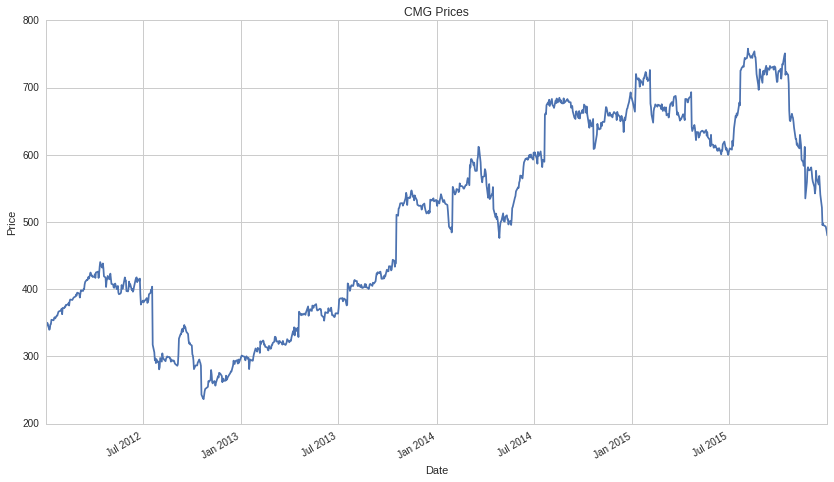

In [32]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

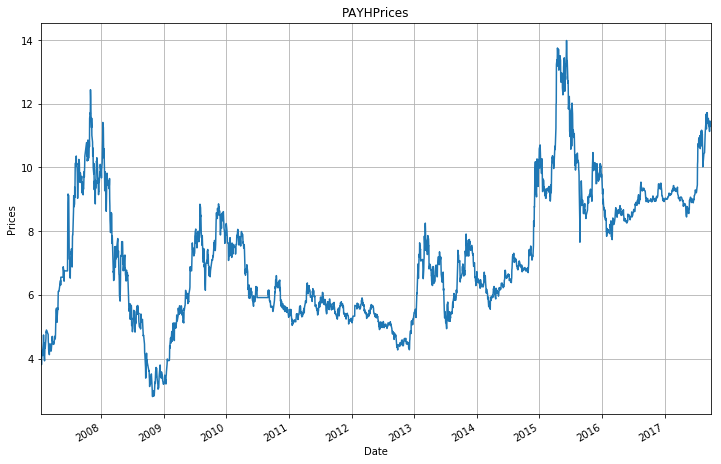

In [19]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + "Prices")
plt.grid(True)
plt.ylabel("Prices")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

使用内置的描述性统计函数：单个指标的函数或者用`describe()`方法做整体描述。

In [33]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  501.64121332
Standard deviation:  146.700132549


In [34]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    1006.000000
mean      501.641213
std       146.700133
min       236.240000
25%       371.605000
50%       521.130000
75%       646.810000
max       757.770000
Name: CMG, dtype: float64


In [20]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  7.17970709728778
Standard deviation:  2.083579555248326


In [21]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    2605.000000
mean        7.179707
std         2.083580
min         2.803994
25%         5.576212
50%         6.778262
75%         8.858879
max        13.986028
Name: PAYH, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

`Series`和标量很容易进行一些简单的算术运算。

In [35]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

2012-01-03 00:00:00+00:00    671.960
2012-01-04 00:00:00+00:00    687.480
2012-01-05 00:00:00+00:00    689.980
2012-01-06 00:00:00+00:00    687.900
2012-01-09 00:00:00+00:00    669.045
Name: CMG, dtype: float64

In [22]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

2007-01-15 00:00:00+08:00   -2.328944
2007-01-16 00:00:00+08:00   -1.990100
2007-01-17 00:00:00+08:00   -1.990100
2007-01-18 00:00:00+08:00   -2.385418
2007-01-19 00:00:00+08:00   -2.023043
Name: PAYH, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

我们也能轻松的对`Series`进行线性组合的操作。pandas通过筛选出组合中各`Series`的相同索引值，并根据这些索引所对应的元素逐个计算并产生一个新的`Series`.

In [36]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

2012-01-03 00:00:00+00:00    371.013281
2012-01-04 00:00:00+00:00    357.417023
2012-01-05 00:00:00+00:00    344.953572
2012-01-06 00:00:00+00:00    407.123572
2012-01-09 00:00:00+00:00    305.081540
dtype: float64

In [24]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

2007-01-15 00:00:00+08:00     3.401865
2007-01-16 00:00:00+08:00    34.870902
2007-01-17 00:00:00+08:00    17.861515
2007-01-18 00:00:00+08:00    45.969083
2007-01-19 00:00:00+08:00    38.561272
dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

如果没有相同的索引值，则会返回一个空的`Series`.

In [37]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00+00:00   NaN
2012-01-04 00:00:00+00:00   NaN
2012-01-05 00:00:00+00:00   NaN
2012-01-06 00:00:00+00:00   NaN
2012-01-09 00:00:00+00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

除了看时序数据本身，我们还想观察它的变化情况,比如一阶差分(连续的相邻两项之差)或者百分比变化率(在本例中，可以计算累加回报或者累乘回报)。这些都可以通过内置函数去实现。

In [38]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

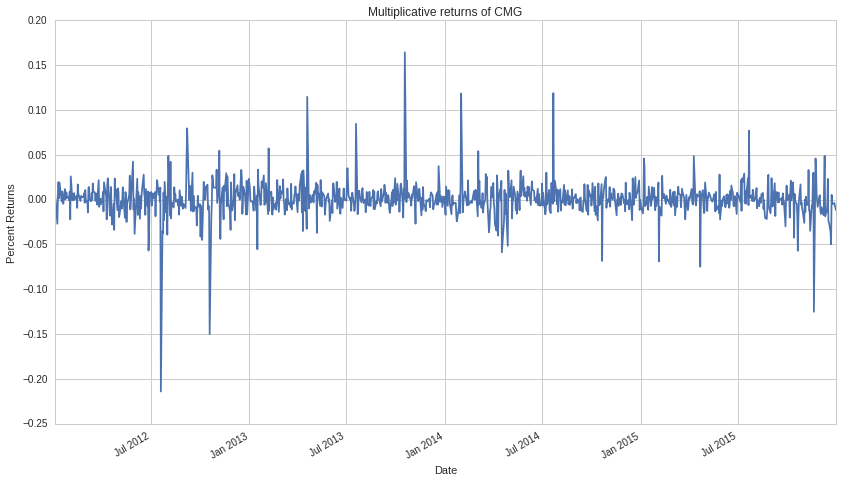

In [39]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

In [26]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

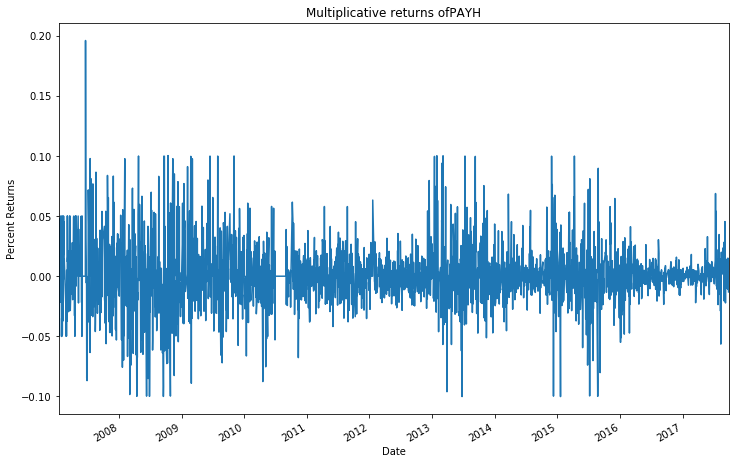

In [27]:
plt.title("Multiplicative returns of" + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

pandas也能很方便的计算移动均值和标准差。

In [40]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

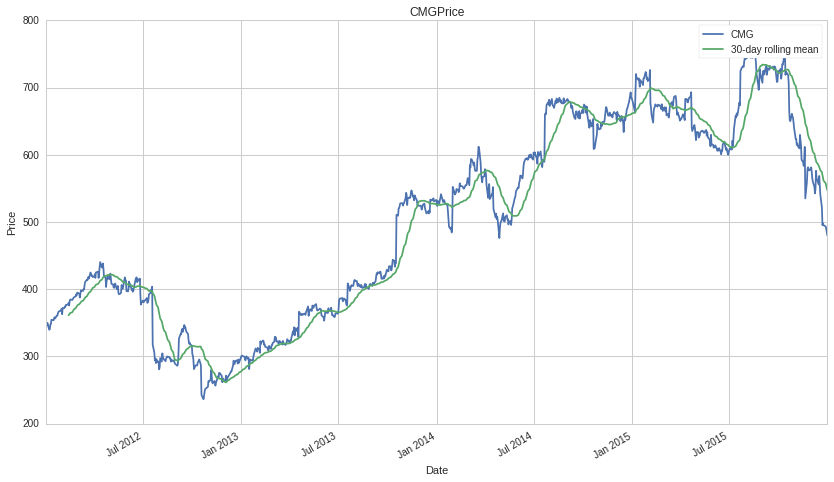

In [41]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [31]:
# rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean = prices.rolling(window=30, center=False).mean()
rolling_mean.name = "30-day rolling mean"

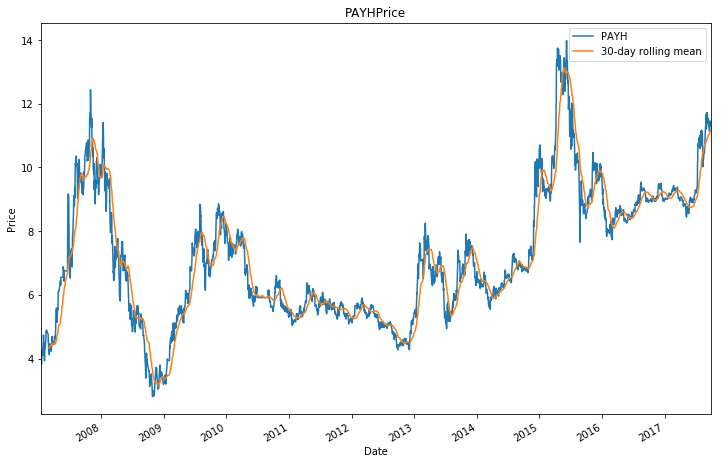

In [32]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [42]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

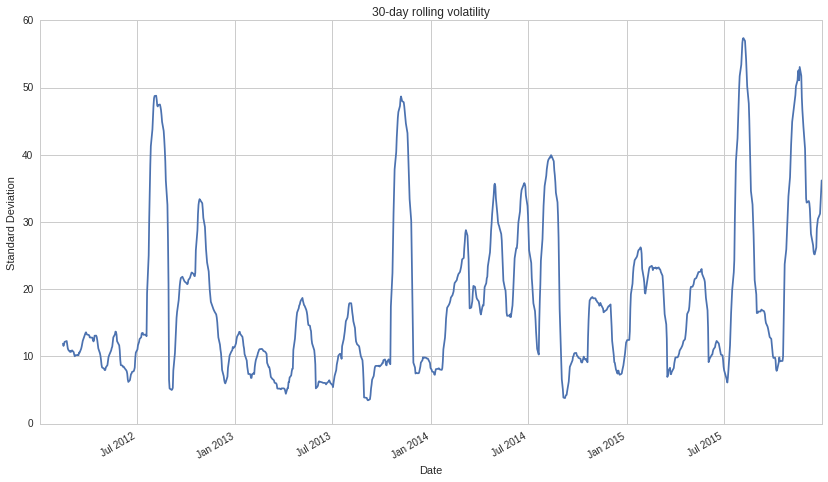

In [43]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

In [33]:
rolling_std = prices.rolling(window=30, center=False).std()
rolling_std.name = "30-day rolling volatility"

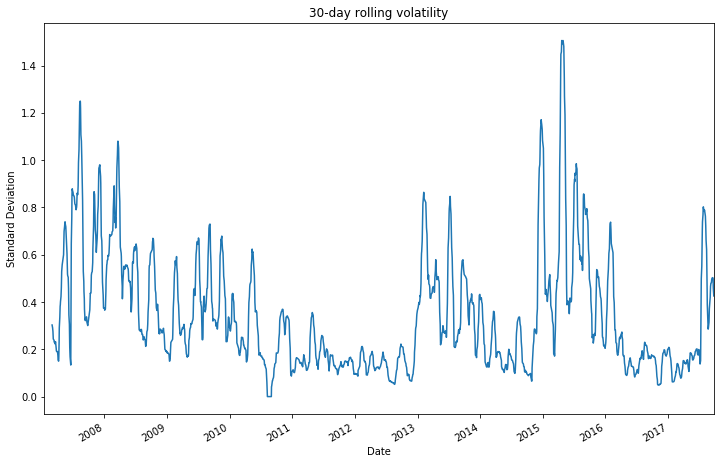

In [34]:
rolling_std.plot()
plt.title(rolling_std.name)
plt.xlabel('Date')
plt.ylabel('Standard Deviation');

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

`Series`也能使用很多NumPy的函数(把`Series`视为NumPy中的一维数组).

In [44]:
print(np.median(mult_returns))

0.000194158599839


In [35]:
print(np.median(mult_returns))

0.0


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

不过上述的这些函数大多都已经是`Series`或`DataFrame`的内置方法了.

In [45]:
print(mult_returns.median())

0.000194158599839


In [36]:
print(mult_returns.median())

0.0


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

从性能上讲，在处理pandas的对象时，使用pandas的内置方法比用NumPy函数效率更高。可以查看[Series的文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html),了解其他更多内置函数。

###  DataFrames

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

###  DataFrames

`DataFrames`一些操作都和在`Series`中一样，pandas的`DataFrame`能够让我们很直观的管理我们的数据

和`Series`一样，`DataFrames`能处理不同类型的数据，但`DataFrames`是一个二维对象，`Series`是一个一维对象。每一个`DataFrames`都有一个`index`属性，一个`columns`属性，稍后我们会更深入地了解它们。`index`属性很像`Series`中的index，很遗憾我们无法一一为大家阐述pandas中index的内容，请大家点击[pandas documentation](http://pandas.pydata.org/pandas-docs/stable/advanced.html)，了解一些indexing的进阶技巧。`columns`表示的是`DataFrame`的另一个维度，允许我们将命名列(named columns，全体`Series`)组合成一个索引一致的内聚对象， 可以理解为是索引都一样的`Series`的集合。

我们可以使用`pandas.DataFrame()`的方法将一个字典或者一个NumPy的`ndarray`生成一个`DataFrame`.亦可通过`pd.concat()`将一组`Series`组合成一个`DataFrame`.

In [4]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print(dict_data)

{'c': array([ 0.12552483,  0.17691405,  1.13305897, -0.64939709, -0.61282282]), 'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z']}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

`DataFrame`有一些关键属性需要牢记于心。首先就是`index`属性，我们可以像对待`Series`一样轻松地构建`Timestamp`对象的`index`。

In [6]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L  0.125525
2016-01-02  2  K  0.176914
2016-01-03  3  J  1.133059
2016-01-04  4  M -0.649397
2016-01-05  5  Z -0.612823


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

正如上面所述，我们可以将`Series`组合`DataFrame`.将具有相同`index`值的元素，排成一行。接下来的例子中的`Series`没有设置`index`，故最后合成的`DataFrame`将会用默认的自然数序列作为`index`.

In [3]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

稍后我们用`pandas.concat()`，将不同的`DataFrame`组合在一起。

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

`DataFrame`的`columns`属性可以在创建`DataFrame`的时候，设定其值，亦可在后面再为其赋值。注意上面的例子中，`Series`已有`name`,故合成后的`DataFrame`将继承他们的`name`.

In [4]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


To modify the columns after object creation, we need only do the following:

修改columns的`name`值：

In [5]:
numbers.columns = ['Shmevens', 'Shmodds']
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [9]:
print(numbers.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [6]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

除了通过`index`和`columns`索引进行访问，亦可通过`.values`的方法直接查看`DataFrame`的值。

In [8]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]], dtype=int64)

This returns a NumPy array.

返回的是一个NumPy数组类型。

In [54]:
type(numbers.values)

<type 'numpy.ndarray'>

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

#### 访问`DataFrame`元素

访问`DataFrame`的元素方法和在`Series`中十分类似，其关键点在于我们现在要考虑多个维度。我们通常一列一列的访问元素，也可以使用`.groupby`的方法。

In [55]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

同样的，这里也为大家提供本地资源，以作为练习之用

In [10]:
symbol = ["PAYH", "WKA", "GNKJ", "SJXY"] # ['平安银行', '万 科A', '国农科技', '世纪星源']
# start = start
# end = end
prices = data.iloc[:,:4]
if isinstance(symbol, list):
    prices.columns = symbol
else:
    prices.name = symbol

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

我们可以直接访问`CMG`series列，注意这种访问方式仅限定`column name`不含空格及其他不友好字符。

In [56]:
prices.CMG.head()

2012-01-03 00:00:00+00:00    340.9800
2012-01-04 00:00:00+00:00    348.7400
2012-01-05 00:00:00+00:00    349.9900
2012-01-06 00:00:00+00:00    348.9500
2012-01-09 00:00:00+00:00    339.5225
Name: CMG, dtype: float64

In [13]:
prices.PAYH.head()

2007-01-15    3.835528
2007-01-16    4.004950
2007-01-17    4.004950
2007-01-18    3.807291
2007-01-19    3.988479
Name: PAYH, dtype: float64

We can also use `loc[]` to access an individual column like so.

一样能用`.loc[]`访问单独的列：

In [57]:
prices.loc[:, 'CMG'].head()

2012-01-03 00:00:00+00:00    340.9800
2012-01-04 00:00:00+00:00    348.7400
2012-01-05 00:00:00+00:00    349.9900
2012-01-06 00:00:00+00:00    348.9500
2012-01-09 00:00:00+00:00    339.5225
Name: CMG, dtype: float64

In [14]:
prices.loc[:, 'PAYH'].head()

2007-01-15    3.835528
2007-01-16    4.004950
2007-01-17    4.004950
2007-01-18    3.807291
2007-01-19    3.988479
Name: PAYH, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

无论通过何种方式,返回的都是一个`Series`:

In [58]:
print(type(prices.CMG))
print(type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
print(type(prices.PAYH))
print(type(prices.loc[:, 'PAYH']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

如果`pd.DataFrame.loc[]`获取到是一个`tuple`,将会如何处理? 在`DataFrame`中，`tuple`中的第一个元素，视为对`rows(index)`的索引请求，第二个元素视为对`columns`的索引请求。下面的例子中，我们将返回包含`CMG`和`MCD`两列元素(包含所有行)，其中`:`切片代表获取所有的行，`['CMG', 'MCD']`代表要获取哪些列的数据。

In [59]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
2012-01-03 00:00:00+00:00,340.9800,98.81
2012-01-04 00:00:00+00:00,348.7400,99.42
2012-01-05 00:00:00+00:00,349.9900,99.83
2012-01-06 00:00:00+00:00,348.9500,100.59
2012-01-09 00:00:00+00:00,339.5225,99.62


In [16]:
prices.loc[:, ['PAYH', 'WKA']].head()

,PAYH,WKA
2007-01-15,3.835528,5.851616
2007-01-16,4.004950,6.343931
2007-01-17,4.004950,5.709538
2007-01-18,3.807291,5.607110
2007-01-19,3.988479,5.679801


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

`.loc[]`同样的可以使用`DataFrame`的index进行索引：

In [60]:
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,WFM
2015-12-15 00:00:00+00:00,555.6401,116.96,41.5101,32.96
2015-12-16 00:00:00+00:00,568.4200,117.84,40.1400,33.66
2015-12-17 00:00:00+00:00,554.9399,117.56,38.5300,33.38
2015-12-18 00:00:00+00:00,540.7500,116.58,39.3800,32.72
2015-12-21 00:00:00+00:00,521.2300,117.71,38.2050,32.98
2015-12-22 00:00:00+00:00,495.2001,117.71,39.7600,34.78


In [17]:
prices.loc['2015-12-15':'2015-12-22']

,PAYH,WKA,GNKJ,SJXY
2015-12-15,9.642189,19.567309,47.61,9.24
2015-12-16,9.617922,18.741175,47.02,9.19
2015-12-17,9.763525,20.616221,46.88,10.11
2015-12-18,9.892951,22.676915,45.99,10.65
2015-12-21,10.119445,22.676915,46.01,10.42
2015-12-22,10.054732,22.676915,49.88,10.70


This plays nicely with lists of columns, too.

同时对`index`和`columns`进行索引：

In [61]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
2015-12-15 00:00:00+00:00,555.6401,116.96
2015-12-16 00:00:00+00:00,568.4200,117.84
2015-12-17 00:00:00+00:00,554.9399,117.56
2015-12-18 00:00:00+00:00,540.7500,116.58
2015-12-21 00:00:00+00:00,521.2300,117.71
2015-12-22 00:00:00+00:00,495.2001,117.71


In [18]:
prices.loc['2015-12-15':'2015-12-22', ['PAYH', 'WKA']]

,PAYH,WKA
2015-12-15,9.642189,19.567309
2015-12-16,9.617922,18.741175
2015-12-17,9.763525,20.616221
2015-12-18,9.892951,22.676915
2015-12-21,10.119445,22.676915
2015-12-22,10.054732,22.676915


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

通过`.loc[]`,使用整数去进行索引：

In [62]:
prices.iloc[0:2, 1]

2012-01-03 00:00:00+00:00    98.81
2012-01-04 00:00:00+00:00    99.42
Name: MCD, dtype: float64

In [19]:
prices.iloc[0:2, 1]

2007-01-15    5.851616
2007-01-16    6.343931
Name: WKA, dtype: float64

注意：在下面的代码中，需要用list()将range()转换成`list`数据类型

In [63]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
# prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,CMG,WFM
2012-01-04 00:00:00+00:00,348.74,35.725
2012-01-06 00:00:00+00:00,348.95,36.435
2012-01-10 00:00:00+00:00,340.70,36.335
2012-01-12 00:00:00+00:00,347.83,35.935
2012-01-17 00:00:00+00:00,353.61,38.390
2012-01-19 00:00:00+00:00,358.10,38.665
2012-01-23 00:00:00+00:00,360.53,38.060
2012-01-25 00:00:00+00:00,363.28,38.575
2012-01-27 00:00:00+00:00,366.80,37.445
2012-01-31 00:00:00+00:00,367.58,37.015


In [21]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,PAYH,SJXY
2007-01-16,4.004950,3.02
2007-01-18,3.807291,2.95
2007-01-22,4.179078,3.10
2007-01-24,4.167313,3.25
2007-01-26,4.299086,3.23
2007-01-30,4.739113,3.15
2007-02-01,4.343794,2.94
2007-02-05,3.927298,2.99
2007-02-07,4.329676,3.06
2007-02-09,4.327323,3.03


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

#### 布尔值索引

可以通过逻辑表达式计算得到布尔值，实现对`DataFrame`的筛选：

In [64]:
prices.loc[prices.MCD > prices.WFM].head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.9800,98.81,NaN,34.810
2012-01-04 00:00:00+00:00,348.7400,99.42,NaN,35.725
2012-01-05 00:00:00+00:00,349.9900,99.83,NaN,36.370
2012-01-06 00:00:00+00:00,348.9500,100.59,NaN,36.435
2012-01-09 00:00:00+00:00,339.5225,99.62,NaN,36.440


In [22]:
print(prices.loc[prices.WKA > prices.GNKJ].head())
print(prices.loc[prices.PAYH > prices.SJXY].tail())

                PAYH       WKA      GNKJ  SJXY
2007-01-15  3.835528  5.851616  4.403847  2.88
2007-01-16  4.004950  6.343931  4.471154  3.02
2007-01-17  4.004950  5.709538  4.384616  3.06
2007-01-18  3.807291  5.607110  4.317308  2.95
2007-01-19  3.988479  5.679801  4.375000  2.99
             PAYH    WKA   GNKJ  SJXY
2017-09-19  11.13  28.77  24.48  5.34
2017-09-20  11.29  28.73  24.49  5.29
2017-09-21  11.46  28.40  24.32  5.16
2017-09-22  11.44  27.81  24.27  5.12
2017-09-25  11.29  26.12  24.15  5.05


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

同样的，使用`&`, `|`, 和 `~`逻辑操作符(分别对应与、或、非三种运算)可以组成复合的判断条件：

In [65]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,92.42,45.80,52.10
2015-02-02 00:00:00+00:00,712.55,92.49,43.50,53.15
2015-02-03 00:00:00+00:00,726.07,93.92,44.87,53.41
2015-02-04 00:00:00+00:00,676.00,94.02,41.32,53.67
2015-02-05 00:00:00+00:00,670.62,94.32,42.46,53.38


In [23]:
prices.loc[(prices.PAYH > prices.GNKJ) & ~prices.WKA.isnull()].head()

,PAYH,WKA,GNKJ,SJXY
2007-06-21,8.883199,10.094502,8.00,8.9
2007-06-22,9.165411,9.810080,7.60,8.9
2007-06-25,9.113629,9.620465,7.22,8.9
2007-06-26,9.113629,9.680343,6.86,8.9
2007-06-27,8.342077,10.069553,7.01,8.9


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

#### `DataFrames`/`Series`列的添加，删除或者合并

`DataFrame`除了填充数据，我们还需要添加数据。

我们将给`DataFrame`增加一个新的列。课程中介绍的方法，pandas官方文档已经不推荐使用了，并且会抛出一个警告。

课程中的方法：通过`get_pricing()`获得的数据(`Series`类型)，直接用`.loc[]`索引的方式进行赋值添加.

推荐使用pandas官方文档的方法：将新的数据作为参数传递给`.assign()`，实现添加一个新的列，并生成一个新的`DataFrame`，将这个新的`DataFrame`赋值给原来的`DataFrame`.

In [66]:
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.9800,98.81,NaN,34.810,28.06
2012-01-04 00:00:00+00:00,348.7400,99.42,NaN,35.725,27.71
2012-01-05 00:00:00+00:00,349.9900,99.83,NaN,36.370,27.12
2012-01-06 00:00:00+00:00,348.9500,100.59,NaN,36.435,26.94
2012-01-09 00:00:00+00:00,339.5225,99.62,NaN,36.440,27.21


如果我们使用
```python
prices.loc[:, 'SZYA'] = s_1
```
则会抛出一个文本：
```
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
```

In [26]:
s_1 = data.iloc[:,4]
# prices.loc[:, 'SZYA'] = s_1
prices = prices.assign(SZYA = s_1)
prices.head(5)

,PAYH,WKA,GNKJ,SJXY,SZYA
2007-01-15,3.835528,5.851616,4.403847,2.88,2.367783
2007-01-16,4.004950,6.343931,4.471154,3.02,2.589965
2007-01-17,4.004950,5.709538,4.384616,3.06,2.330482
2007-01-18,3.807291,5.607110,4.317308,2.95,2.124517
2007-01-19,3.988479,5.679801,4.375000,2.99,2.137491


It is also just as easy to remove a column.

In [67]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.9800,98.81,NaN,34.810
2012-01-04 00:00:00+00:00,348.7400,99.42,NaN,35.725
2012-01-05 00:00:00+00:00,349.9900,99.83,NaN,36.370
2012-01-06 00:00:00+00:00,348.9500,100.59,NaN,36.435
2012-01-09 00:00:00+00:00,339.5225,99.62,NaN,36.440


In [27]:
prices = prices.drop('SZYA', axis=1)
prices.head(5)

,PAYH,WKA,GNKJ,SJXY
2007-01-15,3.835528,5.851616,4.403847,2.88
2007-01-16,4.004950,6.343931,4.471154,3.02
2007-01-17,4.004950,5.709538,4.384616,3.06
2007-01-18,3.807291,5.607110,4.317308,2.95
2007-01-19,3.988479,5.679801,4.375000,2.99


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

使用`pandas.concat()`将多个`DataFrame`合并成一个：

In [68]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,Equity(8554 [SPY]),Equity(38054 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,127.59,2154.88,26.83,58.730,NaN
2012-01-04 00:00:00+00:00,127.68,2111.36,27.39,59.064,NaN
2012-01-05 00:00:00+00:00,128.06,2065.28,27.67,59.710,NaN
2012-01-06 00:00:00+00:00,127.79,2032.00,28.12,60.351,NaN
2012-01-09 00:00:00+00:00,128.00,2002.56,27.74,60.248,NaN


In [28]:
df_1 = data.iloc[:,[5,6]]
df_2 = data.iloc[:,[-1,10]]
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,5,6,3438,10
2007-01-15,1.746300,0.569538,NaN,4.863779
2007-01-16,1.766296,0.568390,NaN,4.875990
2007-01-17,1.752965,0.553462,NaN,5.360333
2007-01-18,1.819618,0.561500,NaN,5.311491
2007-01-19,1.846279,0.570686,NaN,5.502787


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

#### 缺省值の再临

和`Series`一样，用`DataFrame`处理真实数据时，同样会面临`Missing data`,只是这次变成了多维。我们可以和在`Series`中用相似的办法进行处理。

In [69]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.9800,98.81,0.0,34.810
2012-01-04 00:00:00+00:00,348.7400,99.42,0.0,35.725
2012-01-05 00:00:00+00:00,349.9900,99.83,0.0,36.370
2012-01-06 00:00:00+00:00,348.9500,100.59,0.0,36.435
2012-01-09 00:00:00+00:00,339.5225,99.62,0.0,36.440


In [29]:
filled0_prices = df_3.fillna(0)
filled0_prices.head()

,5,6,3438,10
2007-01-15,1.746300,0.569538,0.0,4.863779
2007-01-16,1.766296,0.568390,0.0,4.875990
2007-01-17,1.752965,0.553462,0.0,5.360333
2007-01-18,1.819618,0.561500,0.0,5.311491
2007-01-19,1.846279,0.570686,0.0,5.502787


In [70]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.9800,98.81,45.8,34.810
2012-01-04 00:00:00+00:00,348.7400,99.42,45.8,35.725
2012-01-05 00:00:00+00:00,349.9900,99.83,45.8,36.370
2012-01-06 00:00:00+00:00,348.9500,100.59,45.8,36.435
2012-01-09 00:00:00+00:00,339.5225,99.62,45.8,36.440


In [30]:
# bfilled_prices = prices.fillna(method='bfill')
# bfilled_prices.head(5)

bfilled_prices = df_3.bfill()
bfilled_prices.head()

,5,6,3438,10
2007-01-15,1.746300,0.569538,43.1,4.863779
2007-01-16,1.766296,0.568390,43.1,4.875990
2007-01-17,1.752965,0.553462,43.1,5.360333
2007-01-18,1.819618,0.561500,43.1,5.311491
2007-01-19,1.846279,0.570686,43.1,5.502787


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

在处理时间序列的数据时，对付`Missing data`最好的办法就是舍弃掉这些值：

In [71]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,92.42,45.80,52.10
2015-02-02 00:00:00+00:00,712.55,92.49,43.50,53.15
2015-02-03 00:00:00+00:00,726.07,93.92,44.87,53.41
2015-02-04 00:00:00+00:00,676.00,94.02,41.32,53.67
2015-02-05 00:00:00+00:00,670.62,94.32,42.46,53.38


In [31]:
# dropped_prices = prices.dropna()
# dropped_prices.head(5)

dropped_prices = df_3.dropna()
dropped_prices.head()

,5,6,3438,10
2017-08-07,16.88,7.51,43.10,8.59
2017-08-08,17.18,7.72,47.41,8.49
2017-08-09,16.91,7.70,52.15,8.55
2017-08-10,16.62,7.64,57.37,8.65
2017-08-11,16.70,7.75,53.26,8.42


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

#### 用pandas进行时间序列分析

利用`DataFrame`中内置统计方法，可同时对多个时间序列数据进行分析计算！代码都是和`Series`中一样的，不用担心从头开始学啦。

同样的`.plot()`方法也同样适用，图中的示例默认是各个`columns`的名字。

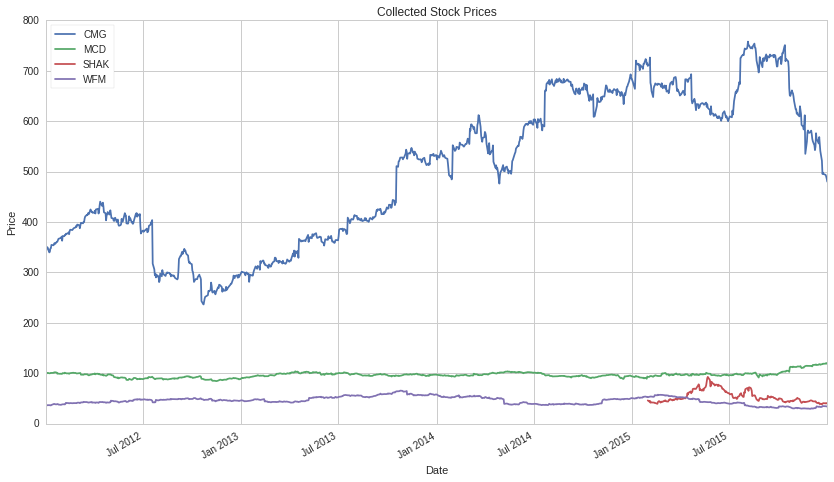

In [72]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

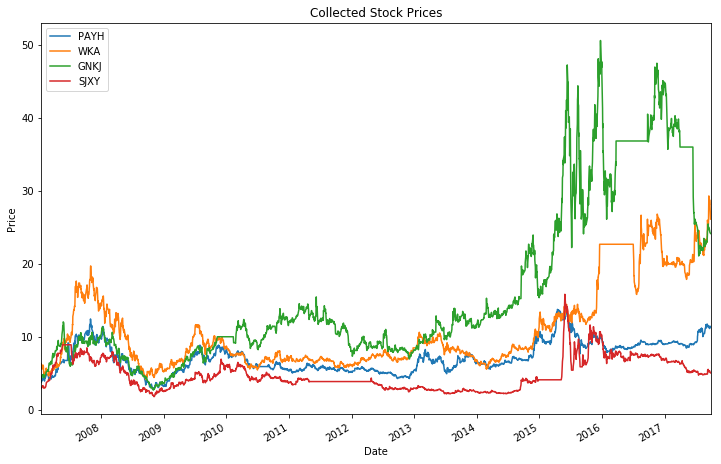

In [32]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

同样的，`Series`中涉及统计学的一些函数在`DataFrame`中同样适用，只是这个时候你需要指定`axis`:
以`.mean()`为例，`axis=0`时，按列求出均值；`axis=1`时，则是按行求出均值；如果我们要计算每只股票的均价，这个时候，`axis=0`.

In [73]:
prices.mean(axis=0)

CMG     501.641213
MCD      96.621592
SHAK     53.532675
WFM      45.592710
dtype: float64

In [33]:
prices.mean(axis=0)

PAYH     7.179707
WKA     10.899163
GNKJ    15.938904
SJXY     4.830868
dtype: float64

As well as the standard deviation:

求标准差

In [74]:
prices.std(axis=0)

CMG     146.700133
MCD       5.715712
SHAK     11.951954
WFM       7.772486
dtype: float64

In [34]:
prices.std(axis=0)

PAYH     2.083580
WKA      5.731132
GNKJ    11.302797
SJXY     2.140174
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

同样的，`.describe()`函数能够一次对我们的数据给出各项描述性统计的计算结果，无需单独计算：

In [75]:
prices.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.641213,96.621592,53.532675,45.592710
std,146.700133,5.715712,11.951954,7.772486
min,236.240000,84.060000,38.205000,29.150000
25%,371.605000,93.675000,NaN,39.792500
50%,521.130000,96.304950,NaN,45.800000
75%,646.810000,99.135000,NaN,51.727500
max,757.770000,120.010000,92.470000,65.235000


In [35]:
prices.describe()

,PAYH,WKA,GNKJ,SJXY
count,2605.000000,2605.000000,2605.000000,2605.000000
mean,7.179707,10.899163,15.938904,4.830868
std,2.083580,5.731132,11.302797,2.140174
min,2.803994,4.144754,2.690000,1.800000
25%,5.576212,6.807493,8.600000,3.060000
50%,6.778262,8.336533,11.350000,4.100000
75%,8.858879,13.073453,21.070000,6.480000
max,13.986028,29.300000,50.600000,15.820000


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

`DataFrame`和标量间的计算

In [76]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,631.960,147.62,NaN,19.62
2012-01-04 00:00:00+00:00,647.480,148.84,NaN,21.45
2012-01-05 00:00:00+00:00,649.980,149.66,NaN,22.74
2012-01-06 00:00:00+00:00,647.900,151.18,NaN,22.87
2012-01-09 00:00:00+00:00,629.045,149.24,NaN,22.88


In [36]:
(2 * prices -4).head()

,PAYH,WKA,GNKJ,SJXY
2007-01-15,3.671056,7.703232,4.807693,1.76
2007-01-16,4.009900,8.687863,4.942309,2.04
2007-01-17,4.009900,7.419076,4.769232,2.12
2007-01-18,3.614582,7.214220,4.634616,1.90
2007-01-19,3.976957,7.359602,4.750001,1.98


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

使用`pct_change()`方法去计算各只股票的累乘回报：

In [77]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM
2012-01-04 00:00:00+00:00,0.022758,0.006173,NaN,0.026286
2012-01-05 00:00:00+00:00,0.003584,0.004124,NaN,0.018055
2012-01-06 00:00:00+00:00,-0.002972,0.007613,NaN,0.001787
2012-01-09 00:00:00+00:00,-0.027017,-0.009643,NaN,0.000137
2012-01-10 00:00:00+00:00,0.003468,0.000402,NaN,-0.002881


In [37]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,PAYH,WKA,GNKJ,SJXY
2007-01-16,0.044172,0.084133,0.015284,0.048611
2007-01-17,0.000000,-0.100000,-0.019355,0.013245
2007-01-18,-0.049354,-0.017940,-0.015351,-0.035948
2007-01-19,0.047590,0.012964,0.013363,0.013559
2007-01-22,0.047788,0.006399,0.050549,0.036789


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

我们对回报数据做标准化处理流程一般是先检测数据，然后在同一比例区间内观察他们彼此的移动趋势，为进一步的分析找寻灵感。

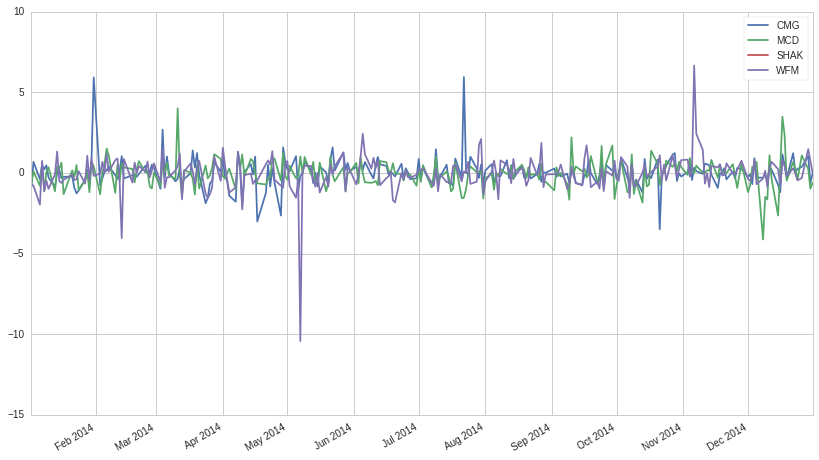

In [78]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

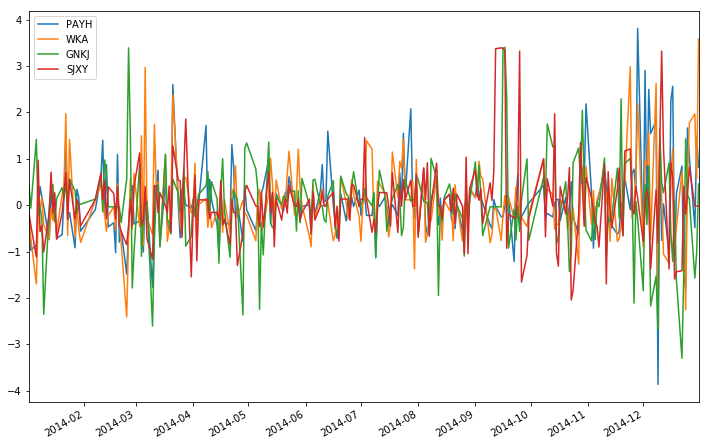

In [38]:
norm_returns = (mult_returns - mult_returns.mean(axis=0)) / mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

由上面的例子可以看出，在pandas中，比较各时间序列数据(股票日线数据)的运动趋势是非常容易实现的.

Rolling means and standard deviations also work with `DataFrames`.

同样的，我们来计算`DataFrame`的移动均值和标准差。

In [79]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

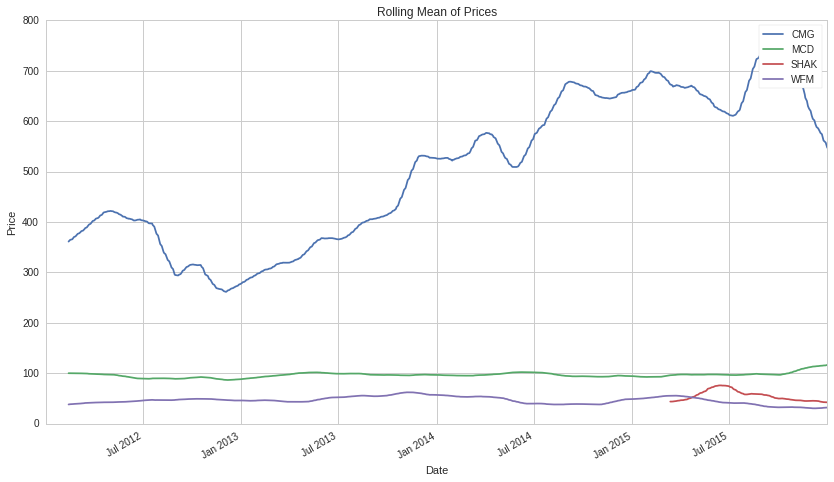

In [80]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [39]:
rolling_mean = prices.rolling(window=30).mean()
rolling_mean.columns = prices.columns

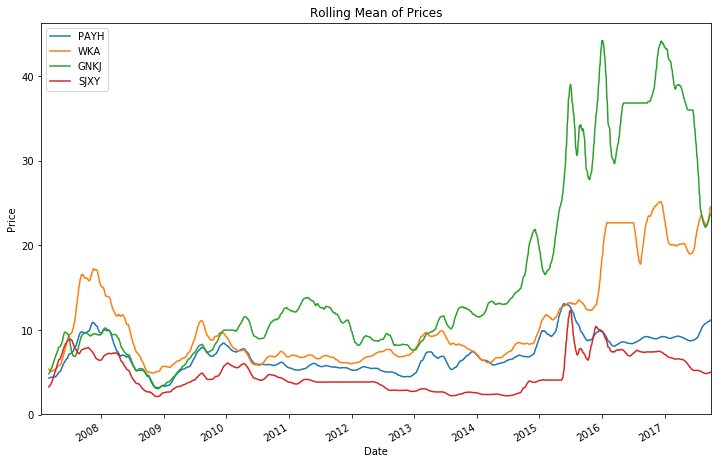

In [40]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

完整的`DataFrame`内置函数列表，请查阅：[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

# Next Steps

运用`pandas`管理数据十分便利，在这里我们只是做了一些常用介绍。在熊猫库中还有很多工具等待你去发现，或许其中就有你想要的。有关`pandas`的一切尽在[这里](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*